## **Problem Statement**

---

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Loan_Default_Risk_Expectancy_/main/loan.jpg" width="900" height="300"/>


*   Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers. The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc.
*   The main objective is to develop a strong ML Model to classify if any new borrower is likely to default or not.

## **Machine Learning Project Life cycle**

1. Data Collection
2. Data Preparation
    1. Exploratory Data Analysis (EDA)
        1. Univariate Analysis
        2. Multivariate Analysis
    2. Data Preprocessing
        1. Feature imputation
        2. Feature encoding
        3. Feature selection
        4. Handle imbalances
3. Model Building
    1. Choosing an algorithm
    2. Hyperparameter Tuning
    3. Performance metrics 
4. Model Deployment

##  1. Data Collection

Based on requirement, Data can be collected by multiple ways such as:
1. By using site specific APIs
2. By means of webscraping(if particular website allows)
3. by online surveys
4. From database etc.

The dataset used for this prediction is taken from kaggle.

### Dataset Attributes Information

- ID = customer id of applicant
- year = year of application
- loan_amount = maximum avaliable amount of the loan allowed to be taken
- Gender = type of gender
- approv_in_adv = whether loan pre apporved or not
- loan_type = type of loan
- loan_purpose = the reason to borrow money
- Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
- open_credit = is pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
- business_or_commercial = usage type of the loan amount
- loan_amount = exact loan amount
- rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
- Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
- Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
- term = the loan's repayment period
- Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
- interest_only = amount of interest only without principles
- lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
- property_value = the present worth of future benefits arising from the ownership of the property
- construction_type = Collateral construction type
- occupancy_type = classifications refer to categorizing structures based on their usage
- Secured_by = Type of Collatoral
- total_units = number of units
- income = amount of money, property, and other transfers of value received over a set period of time
- credit_type = type of credit
- Credit_score = credit score of applicant
- co-applicant_credit_type  =  is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
- age = applicant's age
- submission_of_application = Ensure the application is complete or not
- LTV = Loan-to-Value Ratio
- Region = applicant's place
- Security_Type = Type of Collatoral
- status = Default/not deafult
- dtir1 = debt-to-income ratio

In [2]:
#import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
from imblearn.combine import SMOTETomek
from scipy import stats
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import dataset from kaggle
df = pd.read_csv('/kaggle/input/loan-default-dataset/Loan_Default.csv')

In [4]:
#read first 5 rows of dataset 
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
#read last 5 rows of dataset
df.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [6]:
#shape of dataset
df.shape

(148670, 34)

In [7]:
#for easy access of column names, convert all column names to lower case.
df.columns = df.columns.str.lower()
df.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [8]:
#check for duplicate samples 
df[df.duplicated()]

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1


In [9]:
#ID, year and gender can be dropped off beacuse these features will not contribute to model training
df = df.drop(['id','year','gender'],axis=1)

In [10]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   approv_in_adv              147762 non-null  object 
 2   loan_type                  148670 non-null  object 
 3   loan_purpose               148536 non-null  object 
 4   credit_worthiness          148670 non-null  object 
 5   open_credit                148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           112231 non-null  float64
 9   interest_rate_spread       112031 non-null  float64
 10  upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [11]:
#checking for missing values in dataset
df.isnull().sum().

loan_limit                    3344
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region                           0
security_type       

In [12]:
#function to get value_counts corresponding to unique categories
def get_unique_categories(data):
    for column in data:
        if (data[column].dtype == 'object'): 
            print(column,'\n-------')
            print(data[column].value_counts(dropna=True))
            print('='*27)
        
#value_count_df
get_unique_categories(data = df)

loan_limit 
-------
cf     135348
ncf      9978
Name: loan_limit, dtype: int64
approv_in_adv 
-------
nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64
loan_type 
-------
type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64
loan_purpose 
-------
p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64
credit_worthiness 
-------
l1    142344
l2      6326
Name: credit_worthiness, dtype: int64
open_credit 
-------
nopc    148114
opc        556
Name: open_credit, dtype: int64
business_or_commercial 
-------
nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64
neg_ammortization 
-------
not_neg    133420
neg_amm     15129
Name: neg_ammortization, dtype: int64
interest_only 
-------
not_int     141560
int_only      7110
Name: interest_only, dtype: int64
lump_sum_payment 
-------
not_lpsm    145286
lpsm          3384
Name: lump_sum_payment, dtype: int64
construction_type 
-------
sb    148637
mh        33
N

## Univariate Analysis

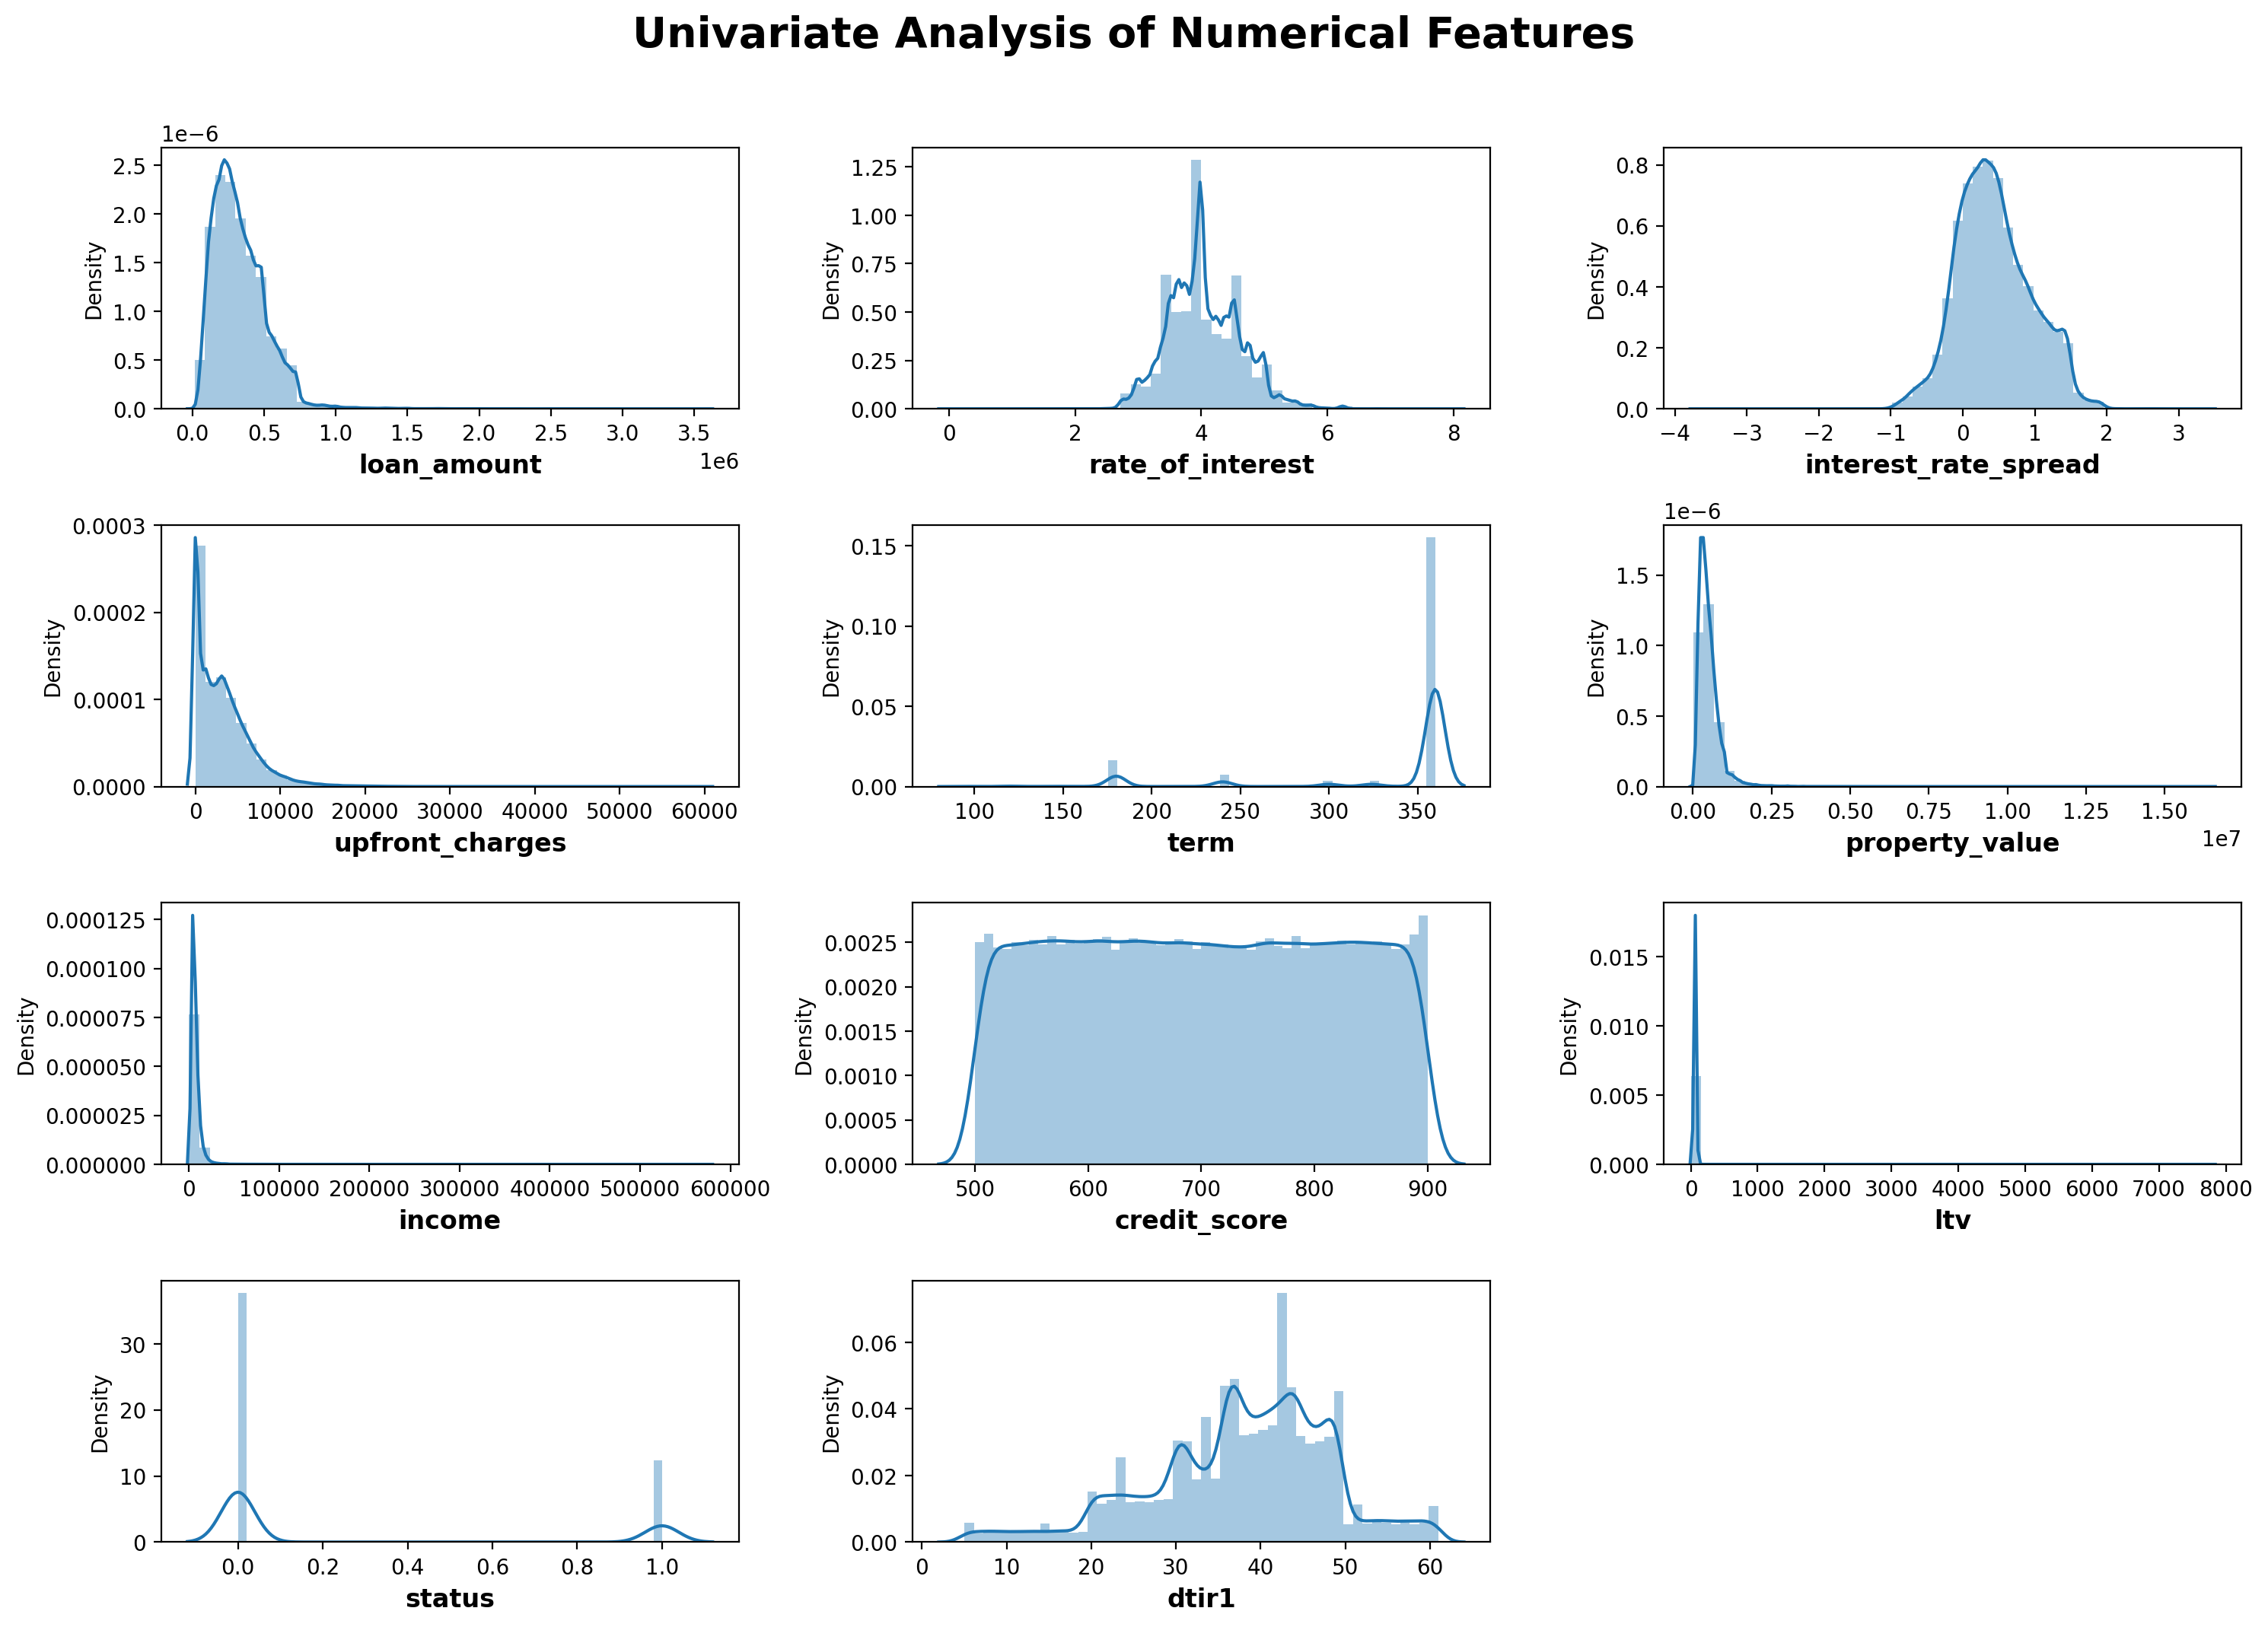

In [13]:
#check out the distribution of all numerical features

def univariate_distplot_numerical(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Univariate Analysis of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype !='object'):
            plt.subplot(6,3,i+1)
            sns.distplot(x = df[col])
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
univariate_distplot_numerical(df)

#### Observation:
- loan_amount is slightly right skewed. some excpetional values may be present there.
- upfront_charges is right skewed. some excpetional values may be present there.
- property_value, income and ltv are also right skewed. but it may be due to presence of some excpetional values.
- dtir1 is left skewed

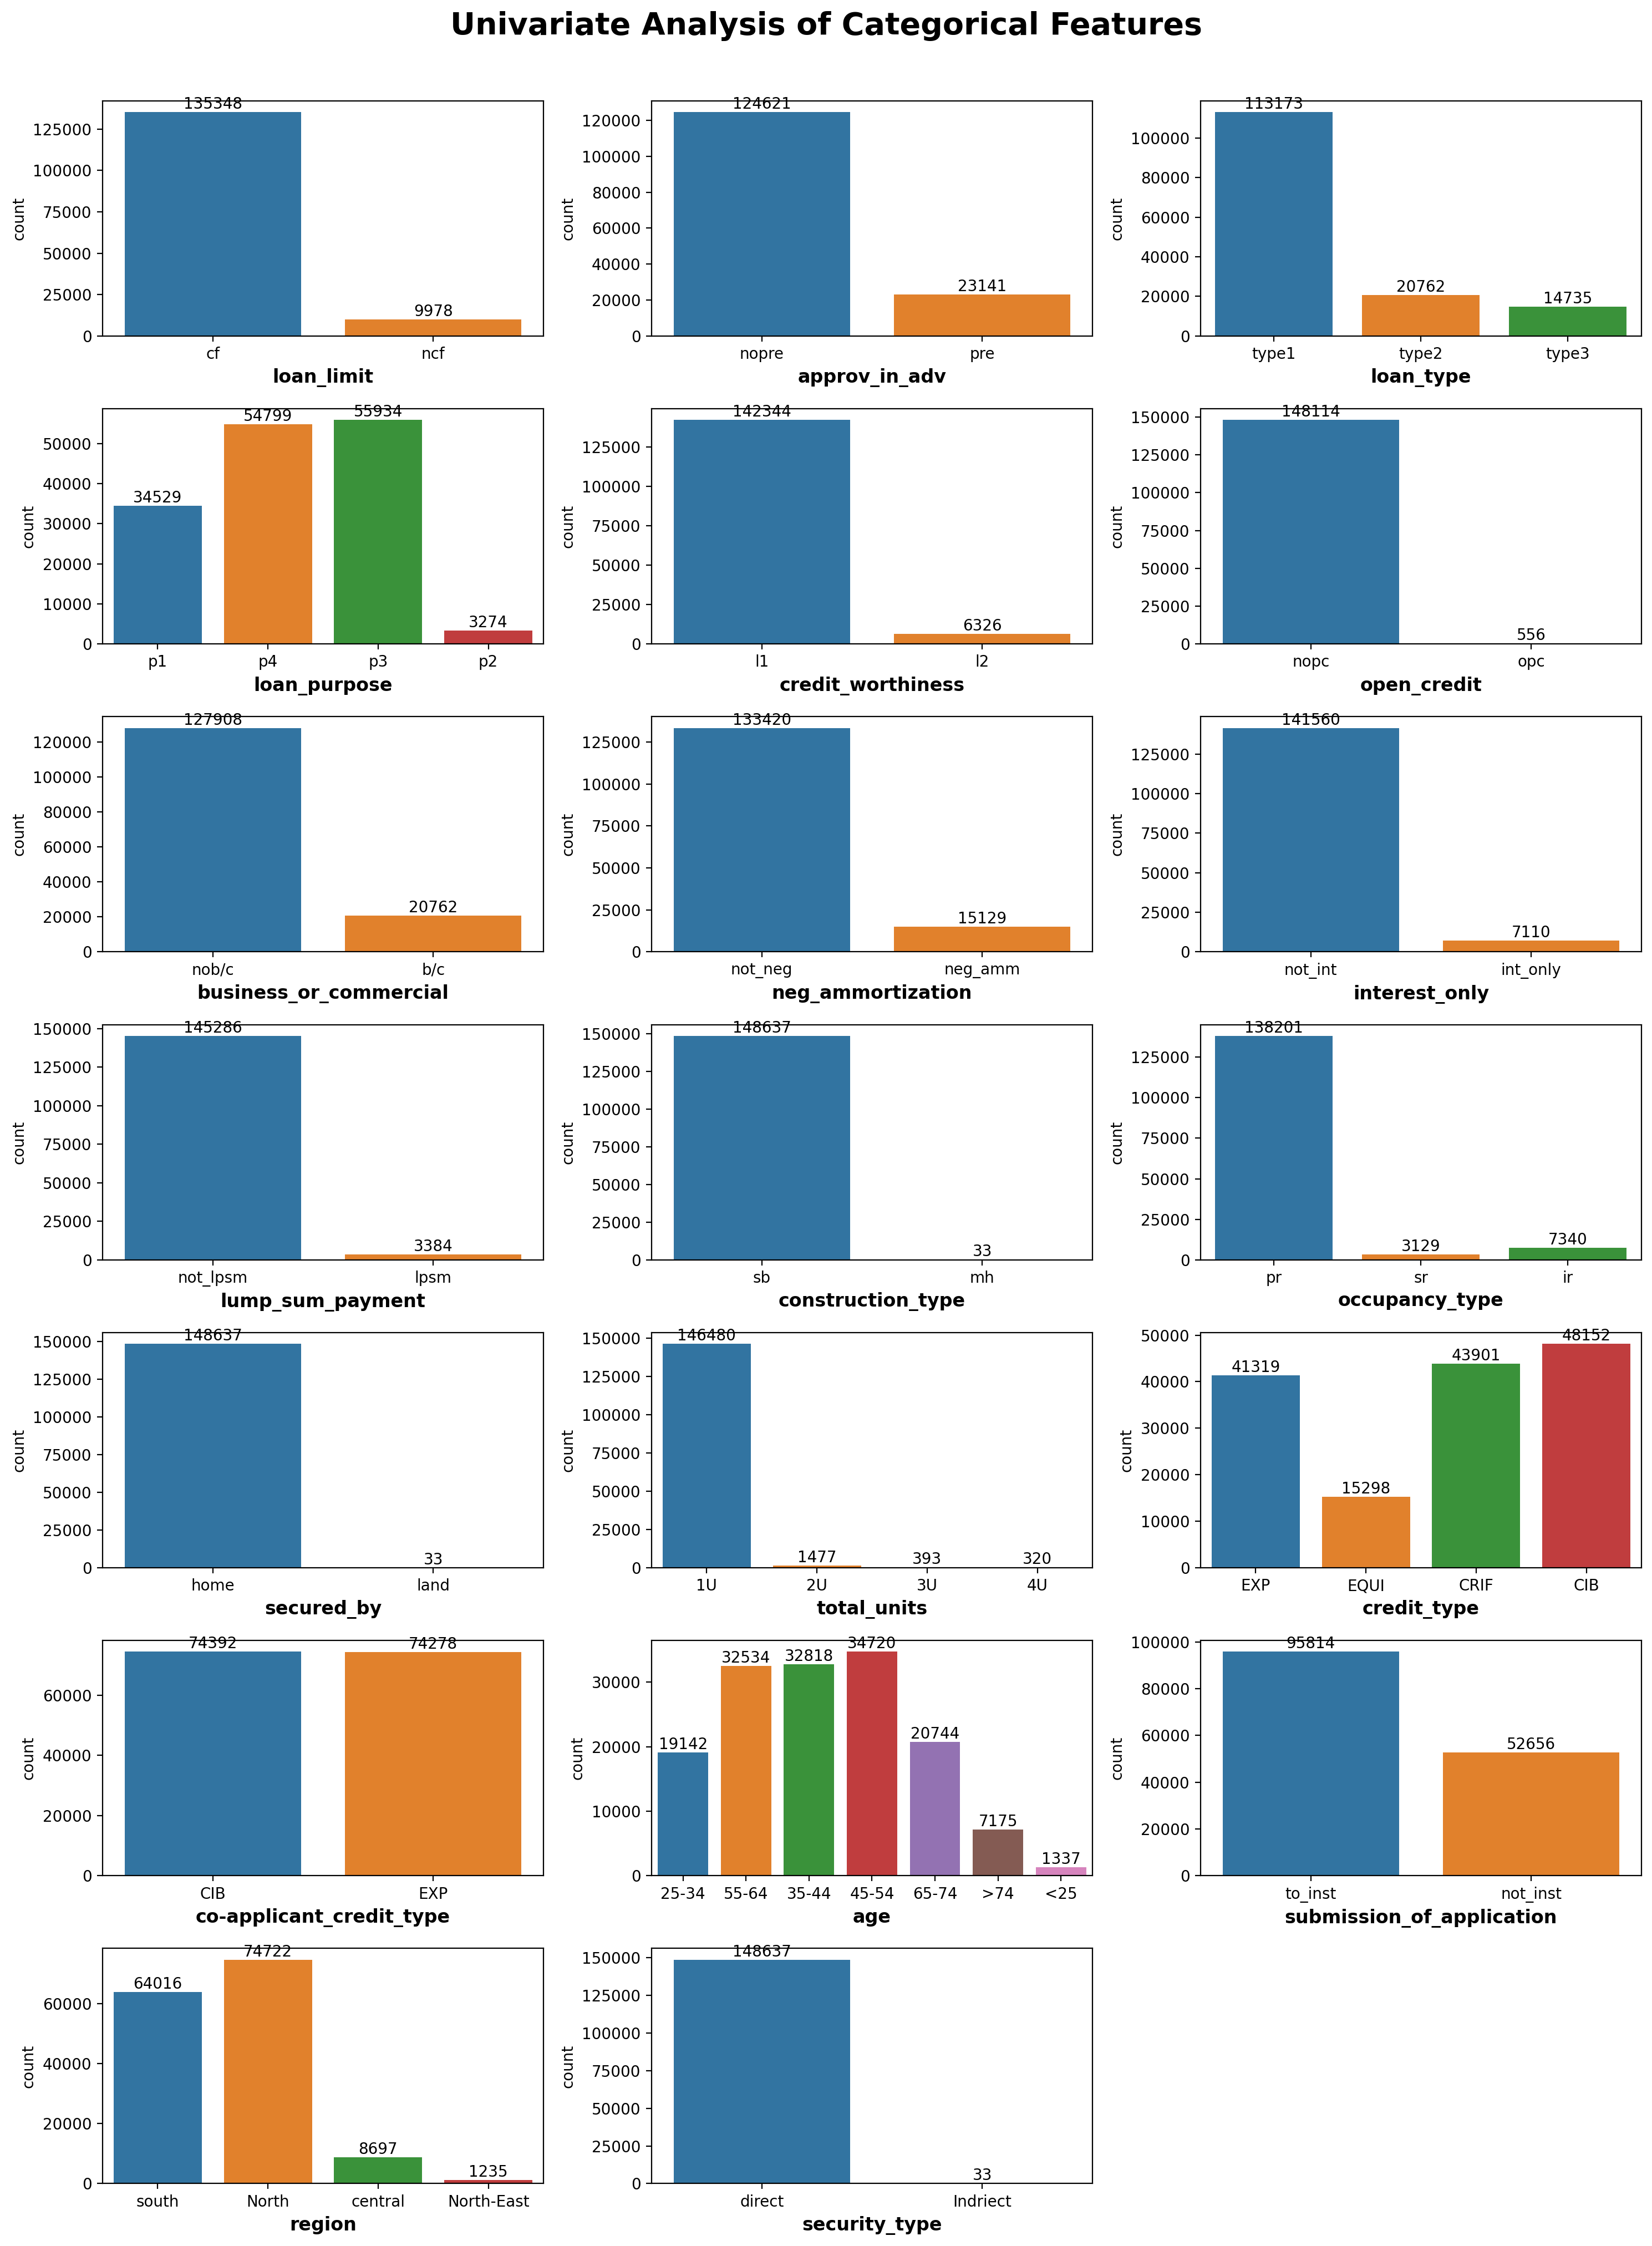

In [14]:
#check out the distribution of all categorical features

def univariate_plot_categorical(df):
    plt.figure(figsize=(15, 20),dpi=200)
    plt.suptitle('Univariate Analysis of Categorical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype =='object'):
            plt.subplot(7,3,i+1)
            ax = sns.countplot(x = col,data=df)
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            for p in ax.containers:
                ax.bar_label(p,padding=0)
            
univariate_plot_categorical(df)

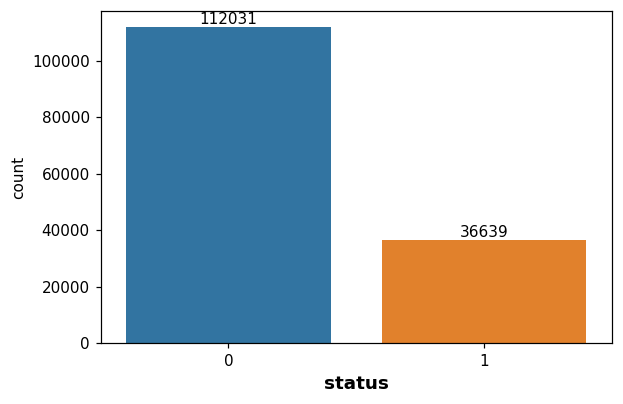

In [15]:
#count of each class in dataset
plt.figure(figsize=(6, 4),dpi=110)
ax = sns.countplot(x = 'status',data=df)
plt.xlabel('status', fontdict={'fontsize':12,'fontweight':'bold'})
for p in ax.containers:
                ax.bar_label(p,padding=0)

In [16]:
#statistics of the dataset
df.describe()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


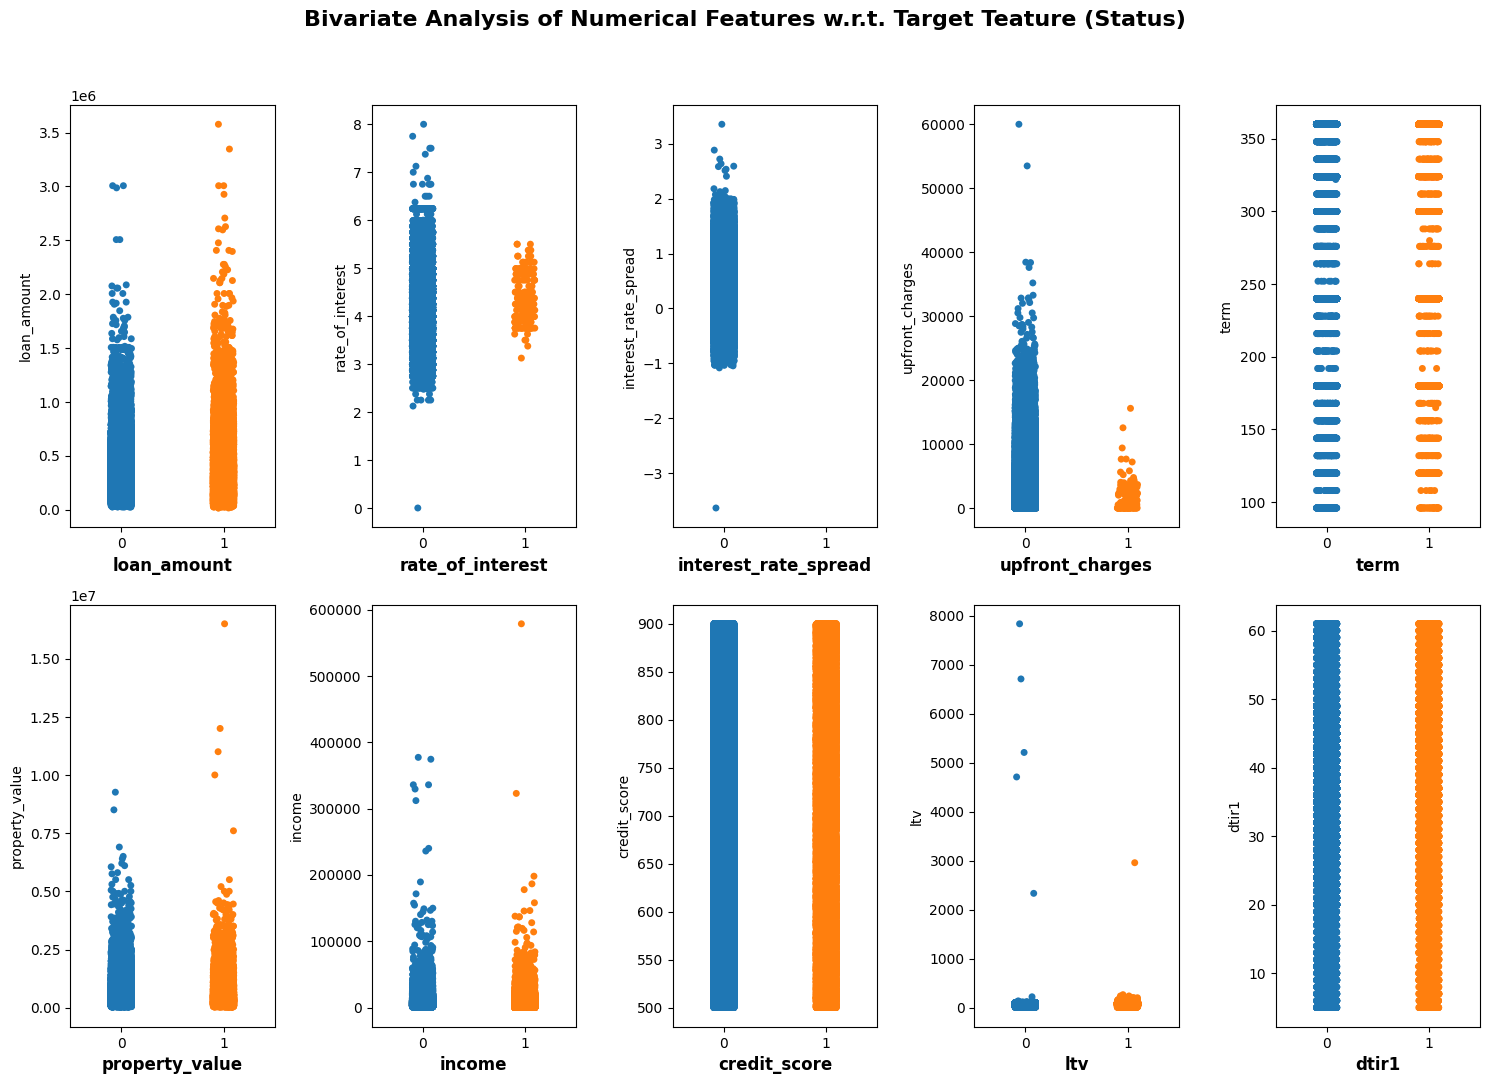

In [17]:
#Bivariate Analysis of Numerical Features w.r.t. Target Teature (Status) 
plt.figure(figsize=(15, 30),dpi = 100)
plt.suptitle('Bivariate Analysis of Numerical Features w.r.t. Target Teature (Status)',fontsize = 16, fontweight = 'bold',alpha = 1, y = 1.01)

i = 1
for col in df:
    if (df[col].dtype != 'object') and (col not in ['status']):
        plt.subplot(6,5,i)
        sns.stripplot(x = 'status', y = col, data = df)
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1

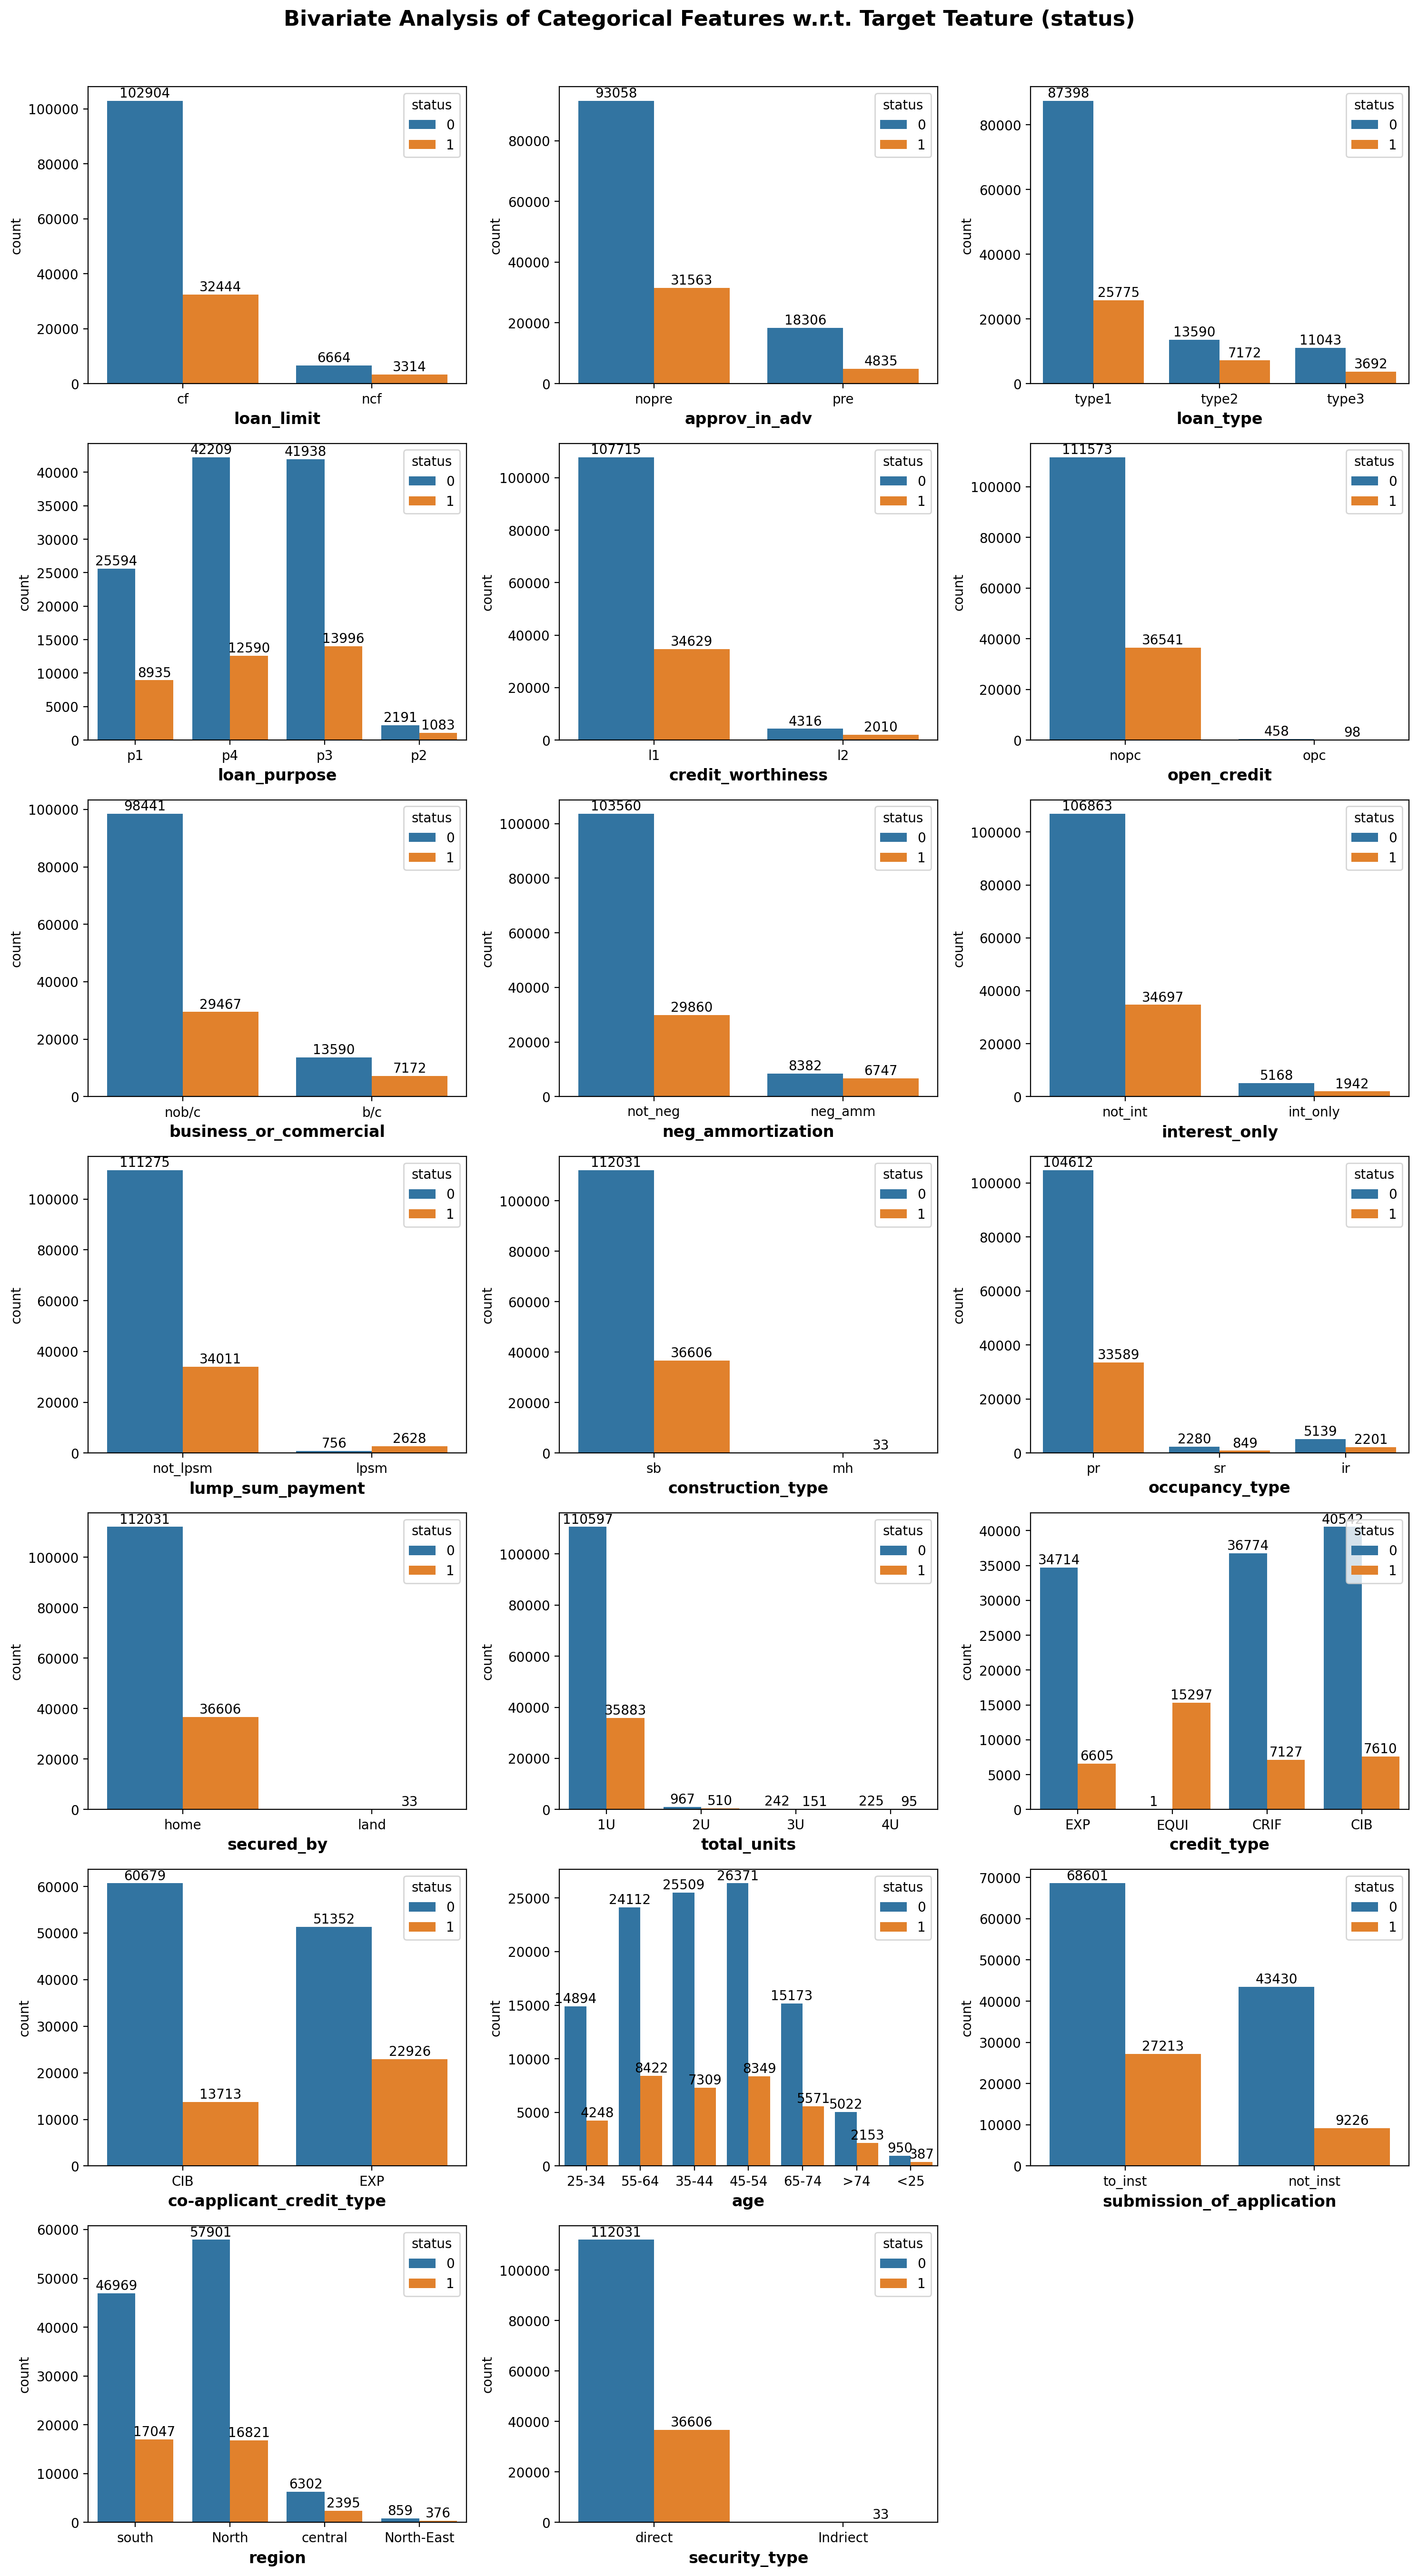

In [18]:
#Bivariate Analysis of Categorical Features w.r.t. Target Teature (status) 
plt.figure(figsize=(15, 30),dpi = 200)
plt.suptitle('Bivariate Analysis of Categorical Features w.r.t. Target Teature (status)',fontsize = 16, fontweight = 'bold',alpha = 1, y = 1.01)

i = 1
for col in df:
    if (df[col].dtype == 'object'):
        plt.subplot(8,3,i)
        ax = sns.countplot(x = col, data = df, hue = 'status') #display mean value of Bike count per hour per category 
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1
        for p in ax.containers:
            ax.bar_label(p,padding=0.5)
plt.show()

#### Observation:
- The plots are displaying highly non uniform distribution of status(target feature) among other independent features. which implies that the dataset is highly imbalanced and it will lead to biased results.

<AxesSubplot:>

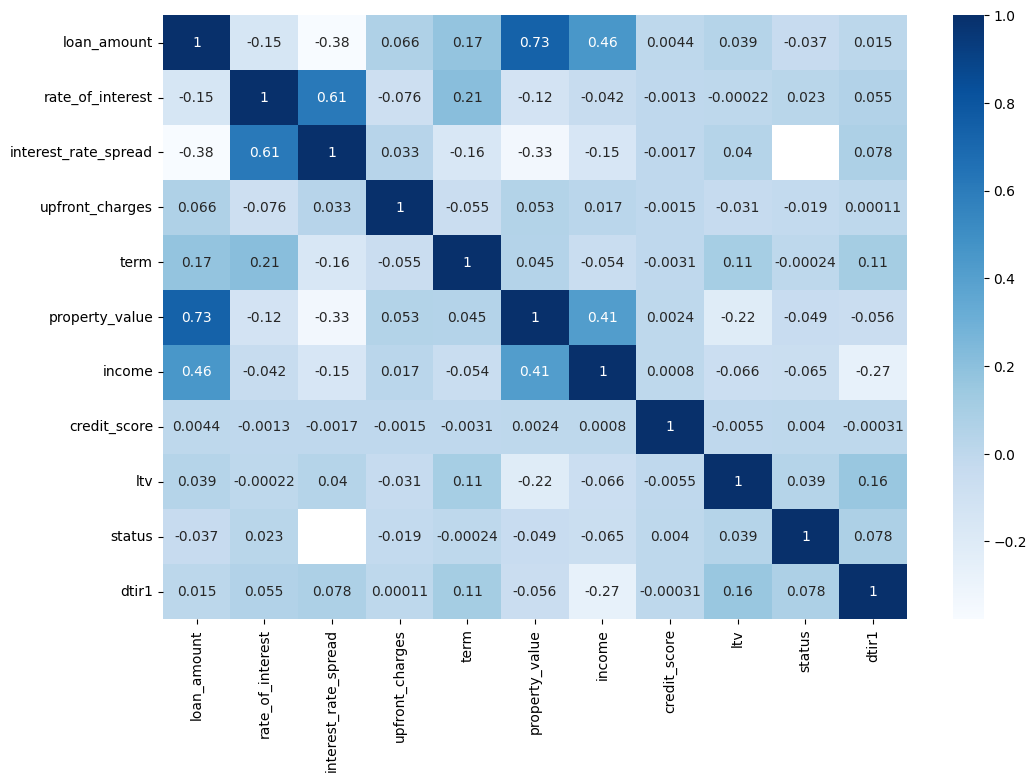

In [19]:
#correlation matrix of the dataset
plt.figure(figsize=(12, 8),dpi = 100)
sns.heatmap(df.corr(),annot=True,cmap='Blues')

#### Observation:
- The correlation matrix is showing that there is no correlation between interest rate spread and status. It also may be due to presence of lagre no. of  missing values. we shall check that correlation matrix again after imputation to verify the assumption.

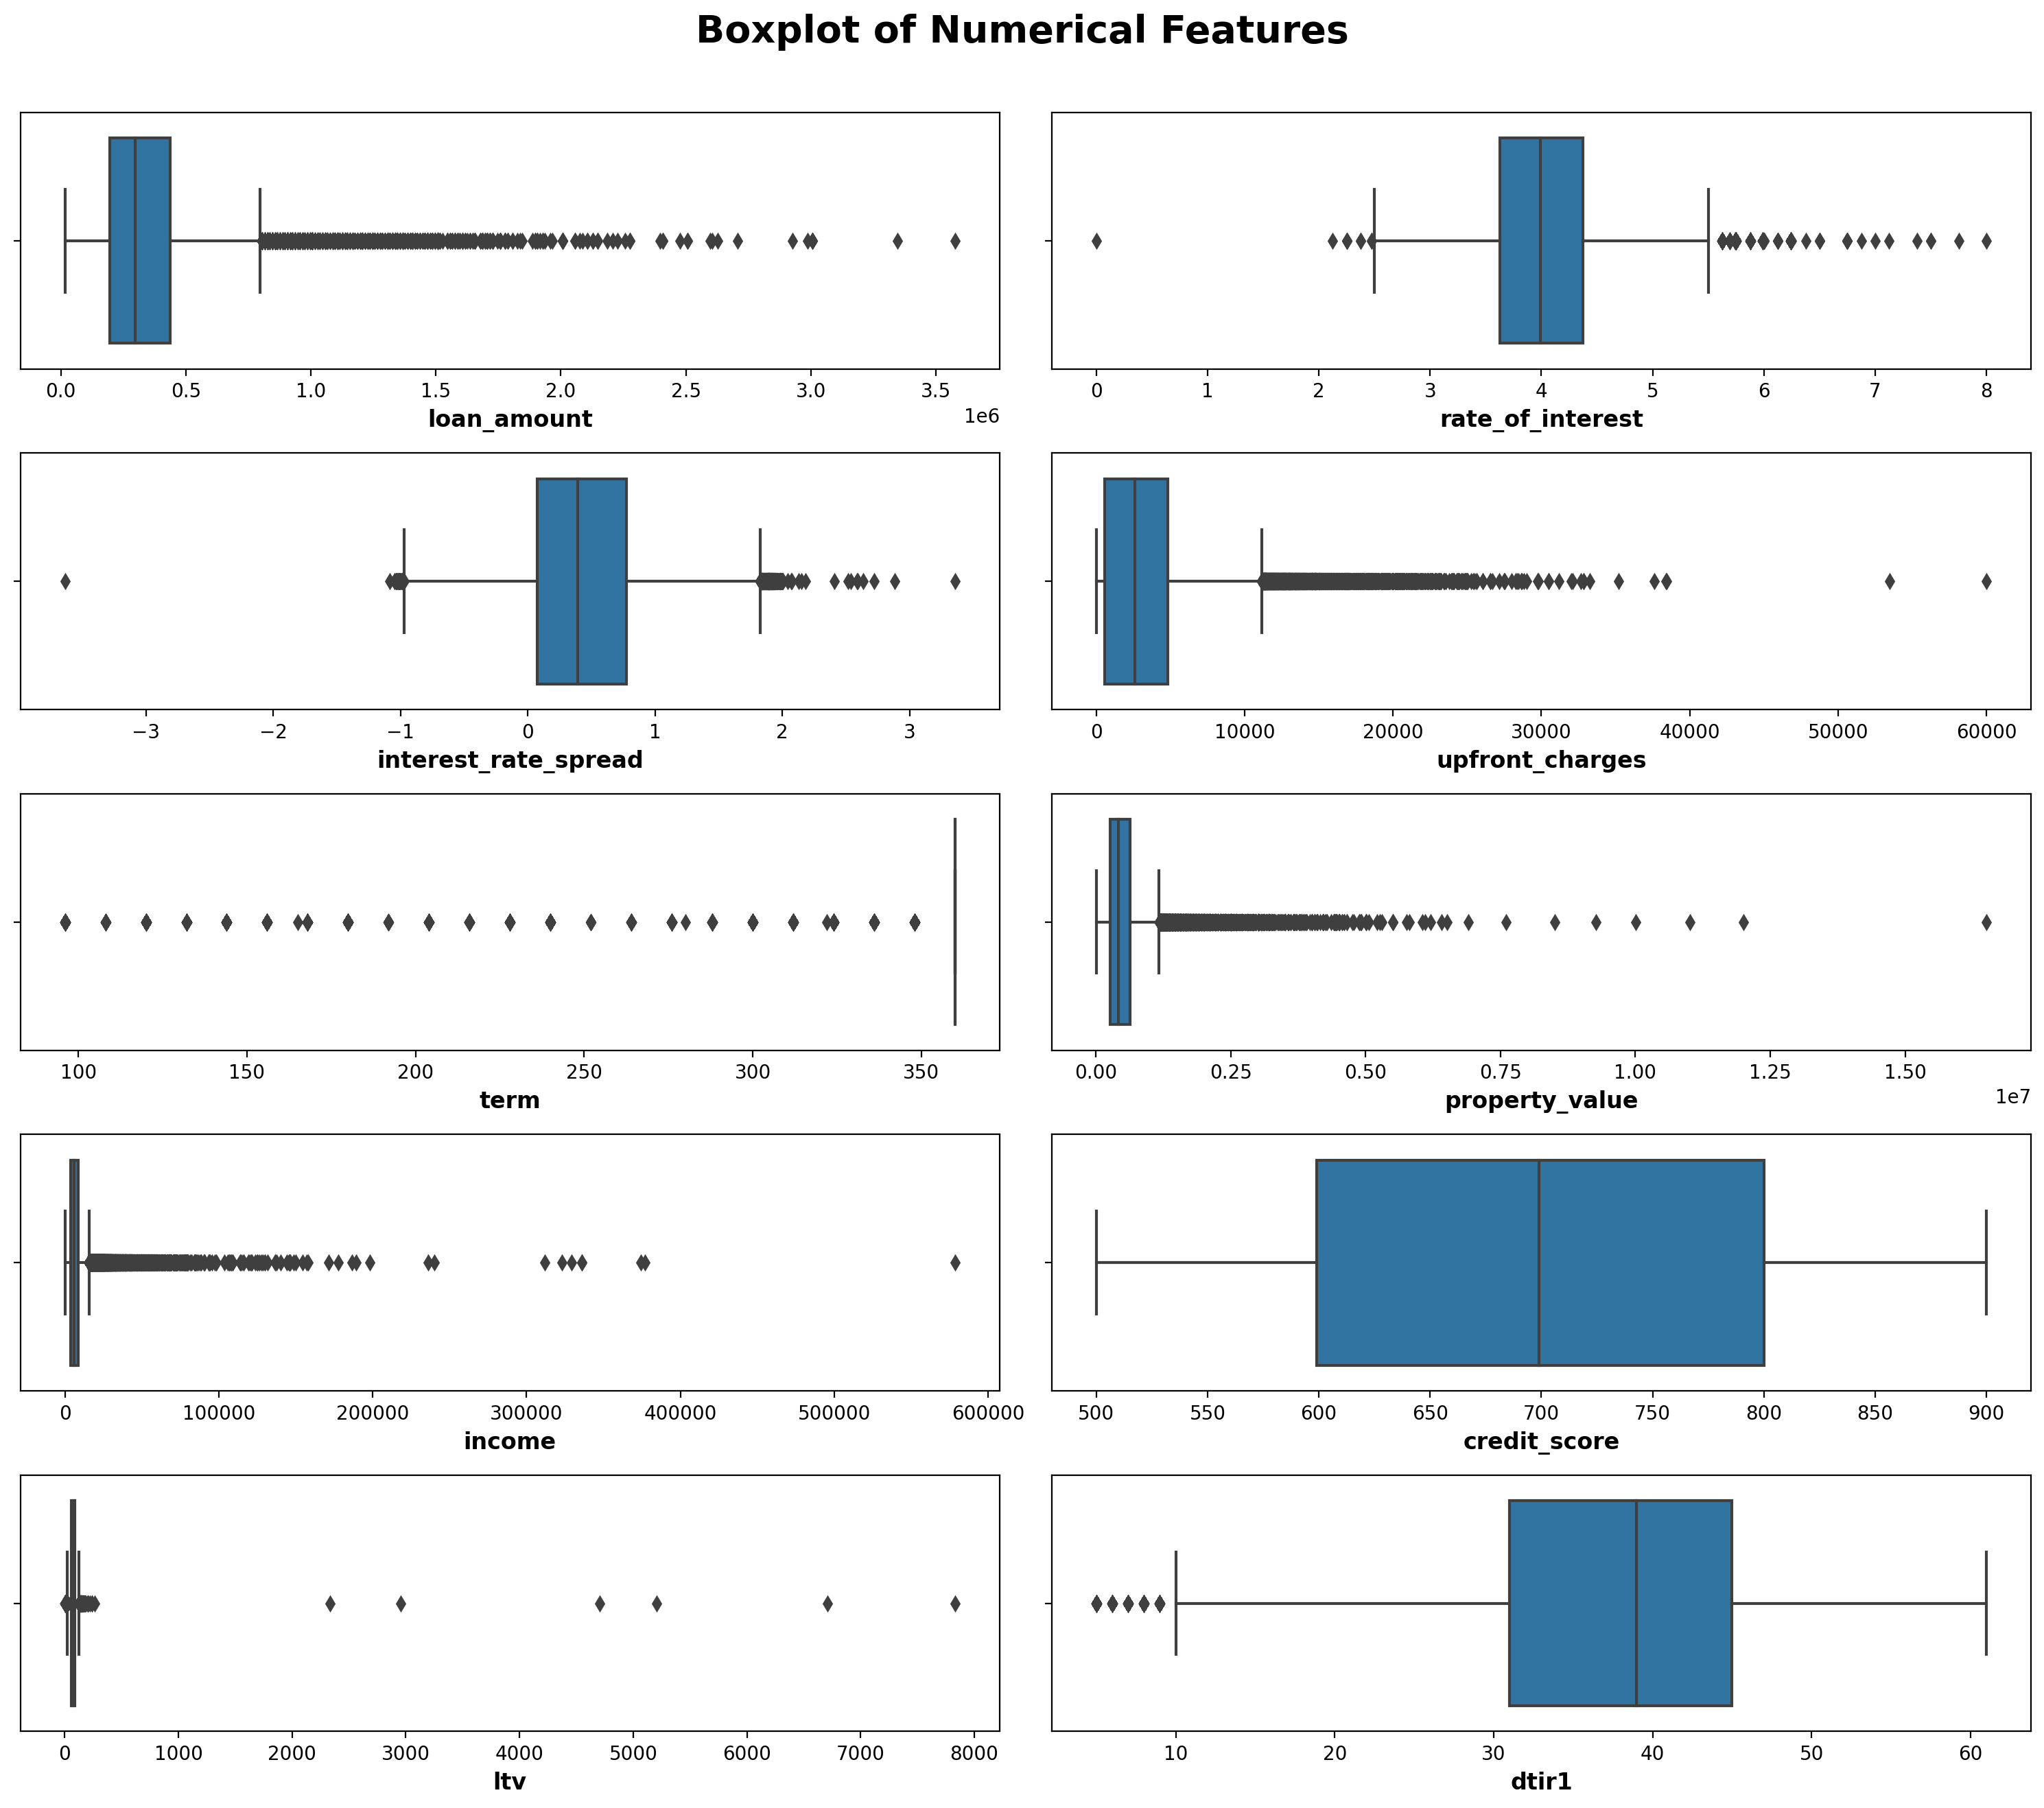

In [20]:
#check out the boxplot of all numerical features

def boxplot(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Boxplot of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype !='object') and (col not in ['status']):
            plt.subplot(6,2,i+1)
            sns.boxplot(x = df[col])
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
boxplot(df)

#### Observation:
- Outliers are observed in almost all the numerical features which may be helpful to us while model training. However we will check the ouliers again after imputation. so, let's not remove these outleirs.

## Feature Engineering

In this section we will perform the following tasks:

#### 1. Handling missing values:
There are number of ways to deal with missing values

   <img src="https://miro.medium.com/max/828/1*vhwpR-qisCWFdpmAugxcIA.webp" width="500"/>



**In deletion,** the particular feature or row having huge number of missing values are removed.

**In imputation,** the missing values are imputed using some techniques such as:
#### A. Univariate imputation techniques:
- the missing values are replaced using the balance data of that particular feature. Most famous and simple methods are **Mean,Median and Mode**. Out of which mean and median are used for numerical feature imputation whereas mode is used for categorical feature imputation. 

#### B. Multivariate imputation techniques:
- In this feature are imputed based on their relation with other features. Most used imputation techniques are:
    - **KNN Imputer:** KNN algorithm is used for feature imputation. it is suitable for both categorical as well as numerical features.
    - **Iterative Imputation:** MICE(Multiple Imputation by Chained Equation) technique is used under this imputation. in this any machine learning algorithm can be used for multiple iteration and imputing the features. it is suitable for both categorical as well as numerical features.
 
#### 2. Handling outliers:
- Oulier may impact the performance of the models but sometime they might be helpul. most commonly used techniques for treating outliers are:
    - **Z-score:**  we use the concept of standard normal distribution. every value outside -3 to +3 is treated as outlier and can be treated depending upon the problem we are trying to solve 
    
   <img src="https://miro.medium.com/max/828/1*ARpoeY3MdhFImq0JXAXtRw.webp" width="500"/>

    - **IQR method:** we use the concept of inter quartile range. every value outside range of lower limit to upper limit is treated as outlier and can be treated depending upon the problem statement
    
   <img src="https://www.statology.org/wp-content/uploads/2021/01/iqrOutlier1-768x204.png" width="500"/>
   
  - **Percentile method:** Based on problem statement and domain knowledge, we can choose the upper and lower limit for outlier treatment using percentile method

#### 3. Categorical features encoding
- Model do understand numerical values only, hence categorical features needs to be converted into numerical values. most common methods are given below:
    - One Hot Encoding
    - Label Encoding
    - Ordinal Encoding
    - Count of Frequency Encoding
    - Target Guided Ordinal Encoding
    - Probability Ratio Encoding

#### 4. Feature scaling
- Every feature is scaled to same range for having better results.

In [21]:
#split dataset into dependent and independent features
X = df.drop(['status'],axis=1)
y = df['status']

In [22]:
#ctegorical columns
cat_cols = X.select_dtypes(include = 'object').columns
print('Categorical Columns in independent features dataset:',cat_cols)
print('='*85)

#numerical columns
num_cols = X.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in independent features dataset:',num_cols)

Categorical Columns in independent features dataset: Index(['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'region', 'security_type'],
      dtype='object')
Numerical Columns in independent features dataset: Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'dtir1'],
      dtype='object')


In [23]:
#split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)

#training ctegorical columns
train_cat_cols = X_train.select_dtypes(include = 'object').columns
print('Categorical Columns in training dataset:',train_cat_cols)
print('='*85)

#training numerical columns
train_num_cols = X_train.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in training dataset:',train_num_cols)

Shape of X_train: (111502, 30)
Shape of X_test: (37168, 30)
Categorical Columns in training dataset: Index(['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'region', 'security_type'],
      dtype='object')
Numerical Columns in training dataset: Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'dtir1'],
      dtype='object')


In [24]:
#create a class to make custom tranformer for numerical features imputation

class NumericalImputationMICE(BaseEstimator, TransformerMixin): 
    
    def __init__(self,columns):
        self.columns = columns
        return None
    
    def fit(self, X, y = None):
        #the type of X might be a DataFrame or a NumPy array depending on the previous transformer object that you use in the pipeline
        return self
    
    def transform(self, X, y = None):
        """
        Impute numeric data using MICE imputation with Decision Tree Regressor.
        (we can use any other regressors to impute the data)
        """
        impute_numeric = IterativeImputer(estimator = DecisionTreeRegressor(),max_iter = 3,initial_strategy = "mean")
        imputed_data = impute_numeric.fit_transform(X[self.columns])
        X[self.columns] =  imputed_data.astype(int)

        return X

In [25]:
#create a class to make custom tranformer for categorical features imputation

class CategoricalImputationMICE(BaseEstimator, TransformerMixin): 
    
    def __init__(self,columns):
        self.columns = columns
        return None
    
    def fit(self, X, y = None):
        #the type of X might be a DataFrame or a NumPy array depending on the previous transformer object that you use in the pipeline

        return self
    
    def transform(self, X, y = None):
        """
        Impute categoric data using MICE imputation with Decision Tree Classifier.
        Steps:
        1. Ordinal Encode the non-null values
        2. Use MICE imputation with Decision Tree Classifier to impute the ordinal encoded data
        (we can use any other classifier to impute the data)
        3. Inverse transform the ordinal encoded data.
        """

        fit_encoder={}
        for col in self.columns:
            #Label encode train data
            nn_vals = X[col][X[col].notnull()]
            fit_encoder[col] = LabelEncoder().fit(nn_vals)
            nn_vals_arr = np.array(fit_encoder[col].transform(nn_vals)).reshape(-1,)
            X[col].loc[df[col].notnull()] = nn_vals_arr

        #Impute the data using MICE with Gradient Boosting Classifier
        impute_categoric = IterativeImputer(estimator = DecisionTreeClassifier(), max_iter = 3, initial_strategy='most_frequent')
        imputed_data = impute_categoric.fit_transform(X[self.columns])

        X[self.columns] =  imputed_data.astype(int)

        #Inverse Transform categorical features
        for col in self.columns:
            #train_arr= np.array(df[col]).reshape(-1,1)
            X[col] = fit_encoder[col].inverse_transform(X[col])

        return X

In [26]:
encoding_params = [('categorical_encoder', OrdinalEncoder(),make_column_selector(dtype_include=object))]

#create an object of column tranforemer pertaining to categorical features encoding
cat_encoding_trf = ColumnTransformer(encoding_params,remainder='passthrough')

In [27]:
scaling_params = [('numerical_scaler', MinMaxScaler(),slice(0,31))]

#create an object of column tranforemer pertaining to feature scaling
scaler = ColumnTransformer(scaling_params) #column get incereased after one hot encoding

In [28]:
#define the steps to follow is pipeline
pipline_steps = [('numerical_imputer',NumericalImputationMICE(columns=train_num_cols)),
                ('categorical_imputer',CategoricalImputationMICE(columns=train_cat_cols)),
                ('categrical_encoder',cat_encoding_trf),
                ('feature_scaler',scaler)]

#create an object of pipeline
pipeline = Pipeline(pipline_steps)   

#display pipline
set_config(display='diagram')

pipeline

Pipeline(steps=[('numerical_imputer',
                 NumericalImputationMICE(columns=Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'dtir1'],
      dtype='object'))),
                ('categorical_imputer',
                 CategoricalImputationMICE(columns=Index(['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose'...
       'submission_of_application', 'region', 'security_type'],
      dtype='object'))),
                ('categorical_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_encoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac36f95a10>)])),
                ('feature_scaler',
                 ColumnTransformer(transformers=[('numerical_scaler',
                                                  MinMaxScaler(),
                                                  slice(0, 31, None))]))])

In [29]:
#create a copy of X_train to show stepwise implementation
X_train_copy = X_train.copy()

In [30]:
#apply numerical imputer 
numerical_imputer_object = pipeline['numerical_imputer'].fit_transform(X_train_copy)
numerical_imputer_object.head()

,loan_limit,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,...,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,dtir1
123891,cf,nopre,type1,p3,l1,nopc,nob/c,726500,4,0,...,10560,CRIF,625,EXP,45-54,not_inst,57,North,direct,30
15938,cf,pre,type1,p1,l1,nopc,nob/c,266500,4,0,...,3240,CRIF,567,CIB,25-34,to_inst,78,North,direct,44
108267,cf,nopre,type2,p4,l1,nopc,b/c,446500,3,0,...,12000,EXP,692,EXP,55-64,not_inst,73,North,direct,22
88902,cf,nopre,type1,p3,l1,nopc,nob/c,296500,3,0,...,5820,CIB,893,EXP,55-64,to_inst,64,North,direct,36
61172,cf,nopre,type1,p3,l1,nopc,nob/c,366500,3,0,...,5160,CRIF,719,EXP,>74,to_inst,58,south,direct,38


In [31]:
#apply categorical imputer 
categorical_imputer_object = pipeline['categorical_imputer'].fit_transform(numerical_imputer_object)
categorical_imputer_object.head()

,loan_limit,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,...,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,dtir1
123891,cf,nopre,type1,p3,l1,nopc,nob/c,726500,4,0,...,10560,CRIF,625,EXP,45-54,not_inst,57,North,direct,30
15938,cf,pre,type1,p1,l1,nopc,nob/c,266500,4,0,...,3240,CRIF,567,CIB,25-34,to_inst,78,North,direct,44
108267,cf,nopre,type2,p4,l1,nopc,b/c,446500,3,0,...,12000,EXP,692,EXP,55-64,not_inst,73,North,direct,22
88902,cf,nopre,type1,p3,l1,nopc,nob/c,296500,3,0,...,5820,CIB,893,EXP,55-64,to_inst,64,North,direct,36
61172,cf,nopre,type1,p3,l1,nopc,nob/c,366500,3,0,...,5160,CRIF,719,EXP,>74,to_inst,58,south,direct,38


In [32]:
#checking for missing values in dataset
categorical_imputer_object.isnull().sum()

loan_limit                   0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
interest_rate_spread         0
upfront_charges              0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
security_type                0
dtir1                        0
dtype: int64

In [34]:
#apply ordinal encoding on categorical columns 
encoder_object = pipeline['categorical_encoder'].fit_transform(categorical_imputer_object)
#pd.DataFrame(encoder).head()
encoder_object

array([[  0.,   0.,   0., ..., 625.,  57.,  30.],
       [  0.,   1.,   0., ..., 567.,  78.,  44.],
       [  0.,   0.,   1., ..., 692.,  73.,  22.],
       ...,
       [  0.,   0.,   0., ..., 675.,  79.,  48.],
       [  0.,   0.,   0., ..., 516.,  37.,  26.],
       [  0.,   0.,   1., ..., 809.,  88.,  21.]])

In [35]:
scaler_object = pipeline['feature_scaler'].fit_transform(encoder_object)
scaler_object

array([[0.        , 0.        , 0.        , ..., 0.3125    , 0.00727876,
        0.44642857],
       [0.        , 1.        , 0.        , ..., 0.1675    , 0.00996041,
        0.69642857],
       [0.        , 0.        , 0.5       , ..., 0.48      , 0.00932193,
        0.30357143],
       ...,
       [0.        , 0.        , 0.        , ..., 0.4375    , 0.01008811,
        0.76785714],
       [0.        , 0.        , 0.        , ..., 0.04      , 0.00472481,
        0.375     ],
       [0.        , 0.        , 0.5       , ..., 0.7725    , 0.01123739,
        0.28571429]])

In [37]:
#runnig all the steps in pipeline altogether 
X_train_trf = pipeline.fit_transform(X_train)
y_train_trf = y_train

#create dataframe of transformed X_train
pd.DataFrame(X_train_trf).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,...,0.199438,0.500,0.5,0.027933,1.000000,0.075758,0.018252,0.3125,0.007279,0.446429
1,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,...,0.070225,0.500,0.5,0.093417,1.000000,0.020000,0.005600,0.1675,0.009960,0.696429
2,0.0,0.0,0.5,1.000000,0.0,0.0,0.0,1.0,1.0,1.0,...,0.120787,0.375,0.5,0.000000,1.000000,0.036364,0.009229,0.4800,0.009322,0.785714
3,0.0,0.0,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,...,0.078652,0.375,0.5,0.051217,0.545455,0.027273,0.010059,0.9825,0.008173,0.553571
4,0.0,0.0,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,...,0.098315,0.375,0.5,0.142800,1.000000,0.037576,0.008918,0.5475,0.007406,0.589286


In [38]:
#runnig all the steps in pipeline altogether 
X_test_trf = pipeline.transform(X_test)
y_test_trf = y_test

#create dataframe of transformed X_train
pd.DataFrame(X_test_trf).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.5,0.666667,0.0,0.0,0.0,1.0,1.0,1.0,...,0.028090,0.500,0.666667,0.041050,1.000000,0.007879,0.003007,0.4475,0.010727,0.642857
1,0.0,1.0,0.0,1.000000,0.0,0.0,1.0,1.0,1.0,1.0,...,0.061798,0.375,0.500000,0.041950,1.000000,0.015758,0.010163,0.8825,0.011237,0.696429
2,0.0,0.0,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,...,0.033708,0.375,0.500000,0.065000,0.954545,0.042424,0.004044,0.2450,0.002426,0.642857
3,0.0,0.0,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,...,0.067416,0.500,0.500000,0.057283,0.318182,0.042424,0.009748,0.6900,0.004597,0.482143
4,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,...,0.188202,0.375,0.500000,0.000000,1.000000,0.050303,0.012341,0.3825,0.010344,0.767857


#### Handle Imbalances
![img](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/03/16142852/ICP3.png)

There are two methods to overcome this imbalanced dataset 1. reducing the frequency or data of majority class by removing. 2. Increasing the data set of minority class by duplication.

In first case (Reducing majority class) : the disadvantage is that important meaning ful data is also removed along with that.Advantage of that is reduced data thus resulting in increased speed and flexibility.

In second case (Increasing the minority class): randomly selecting the minority class values and duplicating them. Adv No information loss. Increase the no. of values of minority class. Disadv Since they data are replicated they cause overfitting of the model.

This could be overcome using oversampling and undersampling i.e., SMOTETomek method

In [39]:
smt = SMOTETomek(sampling_strategy='minority',random_state=0)
X_train_smt,y_train_smt = smt.fit_resample(X_train_trf,y_train_trf)

print(f'The number of class before fit: {Counter(y_train_trf)}')
print(f'The number of class after fit: {Counter(y_train_smt)}')

The number of class before fit: Counter({0: 83981, 1: 27521})



The number of class after fit: Counter({0: 82342, 1: 82342})


## Model Building

#### While training the model, we will check the performance of the model using performance metrics such as accuracy score,precision score, recall score and recall score by use of confusion metrix.

![a.png](https://www.newtechdojo.com/wp-content/uploads/2020/06/CN-Pic4-768x304.png)

### Performance metrics:

**1. Accuracy:** 
- The overall accuracy of a model is simply the number of correct predictions divided by the total number of predictions. An accuracy score    will give a value between 0 and 1, a value of 1 would indicate a perfect model

     <img src="https://keytodatascience.com/wp-content/uploads/2019/09/accuracy-300x61.jpg" width="300"/>

**2. Recall (aka Sensitivity):** 
- Recall is defined as the ratio of the total number of correctly classified positive classes divide by the total number of positive classes. Or, out of all the positive classes, how much we have predicted correctly. Recall should be high.

     <img src="https://keytodatascience.com/wp-content/uploads/2019/09/recall-300x51.jpg" width="300"/>

**3. Precision:** 
- Precision is defined as the ratio of the total number of correctly classified positive classes divided by the total number of predicted positive classes. Or, out of all the predictive positive classes, how much we predicted correctly. Precision should be high.

     <img src="https://keytodatascience.com/wp-content/uploads/2019/09/precision-768x111.jpg" width="300"/>

**4. F1 score:** 
- It is difficult to compare two models with different Precision and Recall. So to make them comparable, we use F-Score. It is the Harmonic Mean of Precision and Recall. As compared to Arithmetic Mean, Harmonic Mean punishes the extreme values more. F-score should be high.

     <img src="https://keytodatascience.com/wp-content/uploads/2019/09/fscore-300x58.jpg" width="300"/>

**5. Specificity:**
- Specificity determines the proportion of actual negatives that are correctly identified.
    
     <img src="https://keytodatascience.com/wp-content/uploads/2019/09/specificity-300x84.jpg" width="300"/>

In [40]:
models = {'Logistic Regression':LogisticRegression(),
          'KNN Classifier' : KNeighborsClassifier(),
          'DecisionTreeClassifier' : DecisionTreeClassifier(),
          'RandomForestClassifier' : RandomForestClassifier(),
          'XGBClassifier' : XGBClassifier()}

In [54]:
#models to be used on dataset
for model in models.values():
    print(model)

LogisticRegression()



KNeighborsClassifier()



DecisionTreeClassifier()



RandomForestClassifier()



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,



              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,



              early_stopping_rounds=None, enable_categorical=False,



              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',



              importance_type=None, interaction_constraints='',



              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,



              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,



              missing=nan, monotone_constraints='()', n_estimators=100,



              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,



              reg_alpha=0, reg_lambda=1, ...)


In [41]:
def compare_models(models:dict):
    
    metrics = {'Models':models.keys(),'accuracy_train':[],'accuracy_test':[],'precision_train':[],'precision_test':[],
               'recall_train':[],'recall_test':[],'f1_score_train':[],'f1_score_test':[]}
    
    for model in models.values():
        #create an object of model
        model_object = model
        
        #fit the model to train dataset 
        model_object.fit(X_train_smt,y_train_smt)
        
        
        #predict the output on test dataset
        y_train_pred = model_object.predict(X_train_smt)
        y_test_pred = model_object.predict(X_test_trf)
        
        #calculate accuracy on train and test dataset
        accuracy_train = accuracy_score(y_train_smt,y_train_pred)
        accuracy_test = accuracy_score(y_test_trf,y_test_pred)
        
        #calculate precision on train and test dataset
        precision_train = precision_score(y_train_smt,y_train_pred,average='macro')
        precision_test = precision_score(y_test_trf,y_test_pred,average='macro')
        
        #calculate recall on train and test dataset
        recall_train = recall_score(y_train_smt,y_train_pred,average='macro')
        recall_test = recall_score(y_test_trf,y_test_pred,average='macro')
        
        #calculate f1_score on train and test dataset
        f1_score_train = f1_score(y_train_smt,y_train_pred,average='macro')
        f1_score_test = f1_score(y_test_trf,y_test_pred,average='macro')
        
        
        #append accurcay list
        metrics['accuracy_train'].append(accuracy_train)
        metrics['accuracy_test'].append(accuracy_test)
       
        #append precision list
        metrics['precision_train'].append(precision_train)
        metrics['precision_test'].append(precision_test)
        
        #append recall list
        metrics['recall_train'].append(recall_train)
        metrics['recall_test'].append(recall_test)
        
        #append f1_score list
        metrics['f1_score_train'].append(f1_score_train)
        metrics['f1_score_test'].append(f1_score_test)
    
    #creata a dataframe of resulted metrics of different models
    models_metrics = pd.DataFrame(metrics)
    
    return models_metrics

In [42]:
models_without_tuning = compare_models(models)

In [43]:
#models metrics with default parameters
models_without_tuning

,Models,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_score_train,f1_score_test
0,Logistic Regression,0.666410,0.676361,0.666859,0.626176,0.666410,0.662036,0.666185,0.626510
1,KNN Classifier,0.913149,0.765928,0.916798,0.700038,0.913149,0.734885,0.912958,0.711215
2,DecisionTreeClassifier,1.000000,0.823800,1.000000,0.762083,1.000000,0.778520,1.000000,0.769475
3,RandomForestClassifier,1.000000,0.895394,1.000000,0.890114,1.000000,0.816774,1.000000,0.844951
4,XGBClassifier,0.944506,0.904811,0.947694,0.906237,0.944506,0.829120,0.944407,0.858780


In [47]:
#params for hyperparameter tuning
model_hyperparameters = {'log_reg_hyperparamters':{'penalty':['l1','l2','elasticnet']},
                         'kNN_clf_hyperparamters':{'n_neighbors':[1,3,5,10,15,20]},
                         
                         'decision_tree_hyperparameters':{'criterion':['gini', 'entropy', 'log_loss'],
                                                          'splitter':['best','random'],
                                                          'ccp_alpha': [0.03,0.05,0.06,0.08]},
                         
                         'random_forest_hyperparameters':{'n_estimators':[30,50,60,80,100],
                                                          'criterion':['gini', 'entropy', 'log_loss'],
                                                          'ccp_alpha': [0.03,0.05,0.06,0.09]},
                         
                         'xgb_hyperparameters':{'n_estimators':[30,50,60,70,90],
                                                'gamma':[0.3,0.5,0.6,0.7,0.8],
                                                'learning_rate': [0.05,0.1,0.15,0.2,0.25]}}

In [48]:
model_keys = list(model_hyperparameters.keys())
model_keys[0]

'log_reg_hyperparamters'

In [49]:
#get best hyperparamters for every model using below function
def ModelSelection(list_of_models,hyperparamter_dictionary):

    result = []
    i = 0
    for model in list_of_models.values():

        #get keys of corresponding model
        keys = model_keys[i]
        
        #get hyperparameters to be tuned
        params = hyperparamter_dictionary[keys]
        
        #create an object of GridSearchCV having 5 no. odf Cross validations
        grid_search = GridSearchCV(estimator = model, param_grid=params, cv = 5, scoring = 'f1',n_jobs=-1)

        #fit train dataset
        grid_search.fit(X_train_smt,y_train_smt)

        #append the results
        result.append({'Model used': model, 'Best params': grid_search.best_params_})
        i+=1
        
    return result

In [50]:
best_hyperparameters = ModelSelection(list_of_models=models, hyperparamter_dictionary=model_hyperparameters)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):



STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.







Increase the number of iterations (max_iter) or scale the data as shown in:



    https://scikit-learn.org/stable/modules/preprocessing.html



Please also refer to the documentation for alternative solver options:



    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):



STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.







Increase the number of iterations (max_iter) or scale the data as shown in:



    https://scikit-learn.org/stable/modules/preprocessing.html



Please also refer to the documentation for alternative solver options:



    https://scikit-learn.org/stable/modu

In [51]:
#best params after hyperparameter tuning using GridsearchCV
best_hyperparameters

[{'Model used': LogisticRegression(), 'Best params': {'penalty': 'l2'}},
 {'Model used': KNeighborsClassifier(), 'Best params': {'n_neighbors': 1}},
 {'Model used': DecisionTreeClassifier(),
  'Best params': {'ccp_alpha': 0.05,
   'criterion': 'entropy',
   'splitter': 'random'}},
 {'Model used': RandomForestClassifier(),
  'Best params': {'ccp_alpha': 0.03,
   'criterion': 'entropy',
   'n_estimators': 80}},
 {'Model used': XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='',
                learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                missing=nan, monotone_constraints='()', n

In [55]:
#models with best hyperparameters
models_with_tuned_hyperparameters = {'Logistic Regression': LogisticRegression(penalty = 'l2'),
                                     'KNN Classifier': KNeighborsClassifier(n_neighbors = 1),
                                     'DecisionTreeClassifier': DecisionTreeClassifier(criterion = 'entropy', splitter = 'random',ccp_alpha = 0.05),
                                     'RandomForestClassifier': RandomForestClassifier(criterion = 'entropy',n_estimators =  80,ccp_alpha = 0.03),
                                     'XGBClassifier': XGBClassifier(booster = 'gbtree', gamma = 0.7, learning_rate = 0.25, n_estimators = 90)}

In [56]:
models_with_tuning = compare_models(models_with_tuned_hyperparameters)

In [57]:
#model_metrics after hyperparameter tuning
models_with_tuning

,Models,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_score_train,f1_score_test
0,Logistic Regression,0.666410,0.676361,0.666859,0.626176,0.666410,0.662036,0.666185,0.626510
1,KNN Classifier,1.000000,0.795604,1.000000,0.724615,1.000000,0.729379,1.000000,0.726912
2,DecisionTreeClassifier,0.722116,0.856382,0.821372,0.920061,0.722116,0.707282,0.698865,0.749627
3,RandomForestClassifier,0.755987,0.846158,0.812275,0.839686,0.755987,0.718644,0.744473,0.751893
4,XGBClassifier,0.937966,0.902577,0.941856,0.906261,0.937966,0.823162,0.937829,0.854408


### Project Summary

#### Let Summarize all the steps teken in this project.
##### 1. Overview of the overall dataset such as
   - The overall dataste consist of 148670 rows and 34 columns.
   - Number of columns removed in beginning are 3 ('id','year','gender').
   - Balace number of categorical columns are 20.
   - Numer of numerical columns are 11.
   - Checked the uniques categories and their repective value count in dataset.
    
##### 2. Checked for missing values an doutliers
   - Total missing values in dataset are 1,81,135.
   - Outliers are checked using boxplot and are observed in almost every numerical feature. but that might be important for model training purpose. so i have not removed.

##### 3. Exploratory Data Analysis
   - Univariate Analysis
       - Checked distribution of nuemrical and catgorical features. None of the numerical feature was normally distributed which may be due to the presence of the outliers.
   - Multivariate Analysis
       - Checked the behaviour of independent catgorical and numerical features with respect to target feature (status), which indicated that dataset in imbalanced. 
       - Correlation is also checked among feautres. however, that might not be correct results due to presence of missing values. Hence it needs to be checked once again after imputation.
       
##### 4. Feature Engineering

 The feature engineering has been done using Sklearn Pipeline which consist of numer of steps such as:
 - *Numerical features imputation* : Iterative imputation **(MICE imputation)** technique is used to impute numerical featues and the algorithm used in this technique was Decision Tree Regressor for numerical features.
 
 - *Categorical features imputation* : Iterative imputation **(MICE imputation)** technique is used to impute categorical features and the algorithm used in this technique was Decision Tree Classifier for categorical features.
 
 - *Categorical feautre encoding* : Every categorical present in this dataset is hvaing 2 - 3 unique feature which needs to be converted into numerical values by using some techniques because the model doesn't understand categorical values.

- *Feature Scaling* : In this every is brought down to same range so that model can perform efftectively
  
##### 5. Handling Imbalances
   - The number of class originally present in dataset are {0: 83981, 1: 27521} which will lead to biased result because occurance of 0 class almost 3 times more than class 1. To have a correct prediction, i have resampled the train dataset using SMOTETomek technique which balanced both the classes and the number of class after resampling became {0: 82342, 1: 82342}
 
##### 6. Model Building
   Models used are:
   - Logistic Regression
   - KNN Classifier
   - DecisionTreeClassifier
   - RandomForestClassifier
   - RandomForestClassifier
   - XGBClassifier
   
   Performance metrics like accuracy, precision, recall were checked before and after hyperparameter tuning.

#### Conclusion

Recalling the problem statement, our aim is to build a model to find out whether a new borrower will default or not?

- Also, if we talk about the confusion matrix, it become more important to keep the **False Negative(FN)** as minimum as possible. because, FN indiactes the default case predicted as not-default which become criitcal as banks earn a major revenue from lending loans and no doubt, it is often associated with risk.

- Therefore keeping aboev scenerio in mind, i have checked out **Accuracy** and **Recall** value in all the models and after careful observation, **XGBClassifier** comes out to be the best model for this problem 